In [2]:
# Loading library
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine



In [5]:
# Load data as a dataframe
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

iris = sklearn_to_df(load_wine())
iris.rename(columns={'target':'level'},inplace=True)

iris.describe()


alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            level  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [6]:
#Show Data
iris.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  level  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

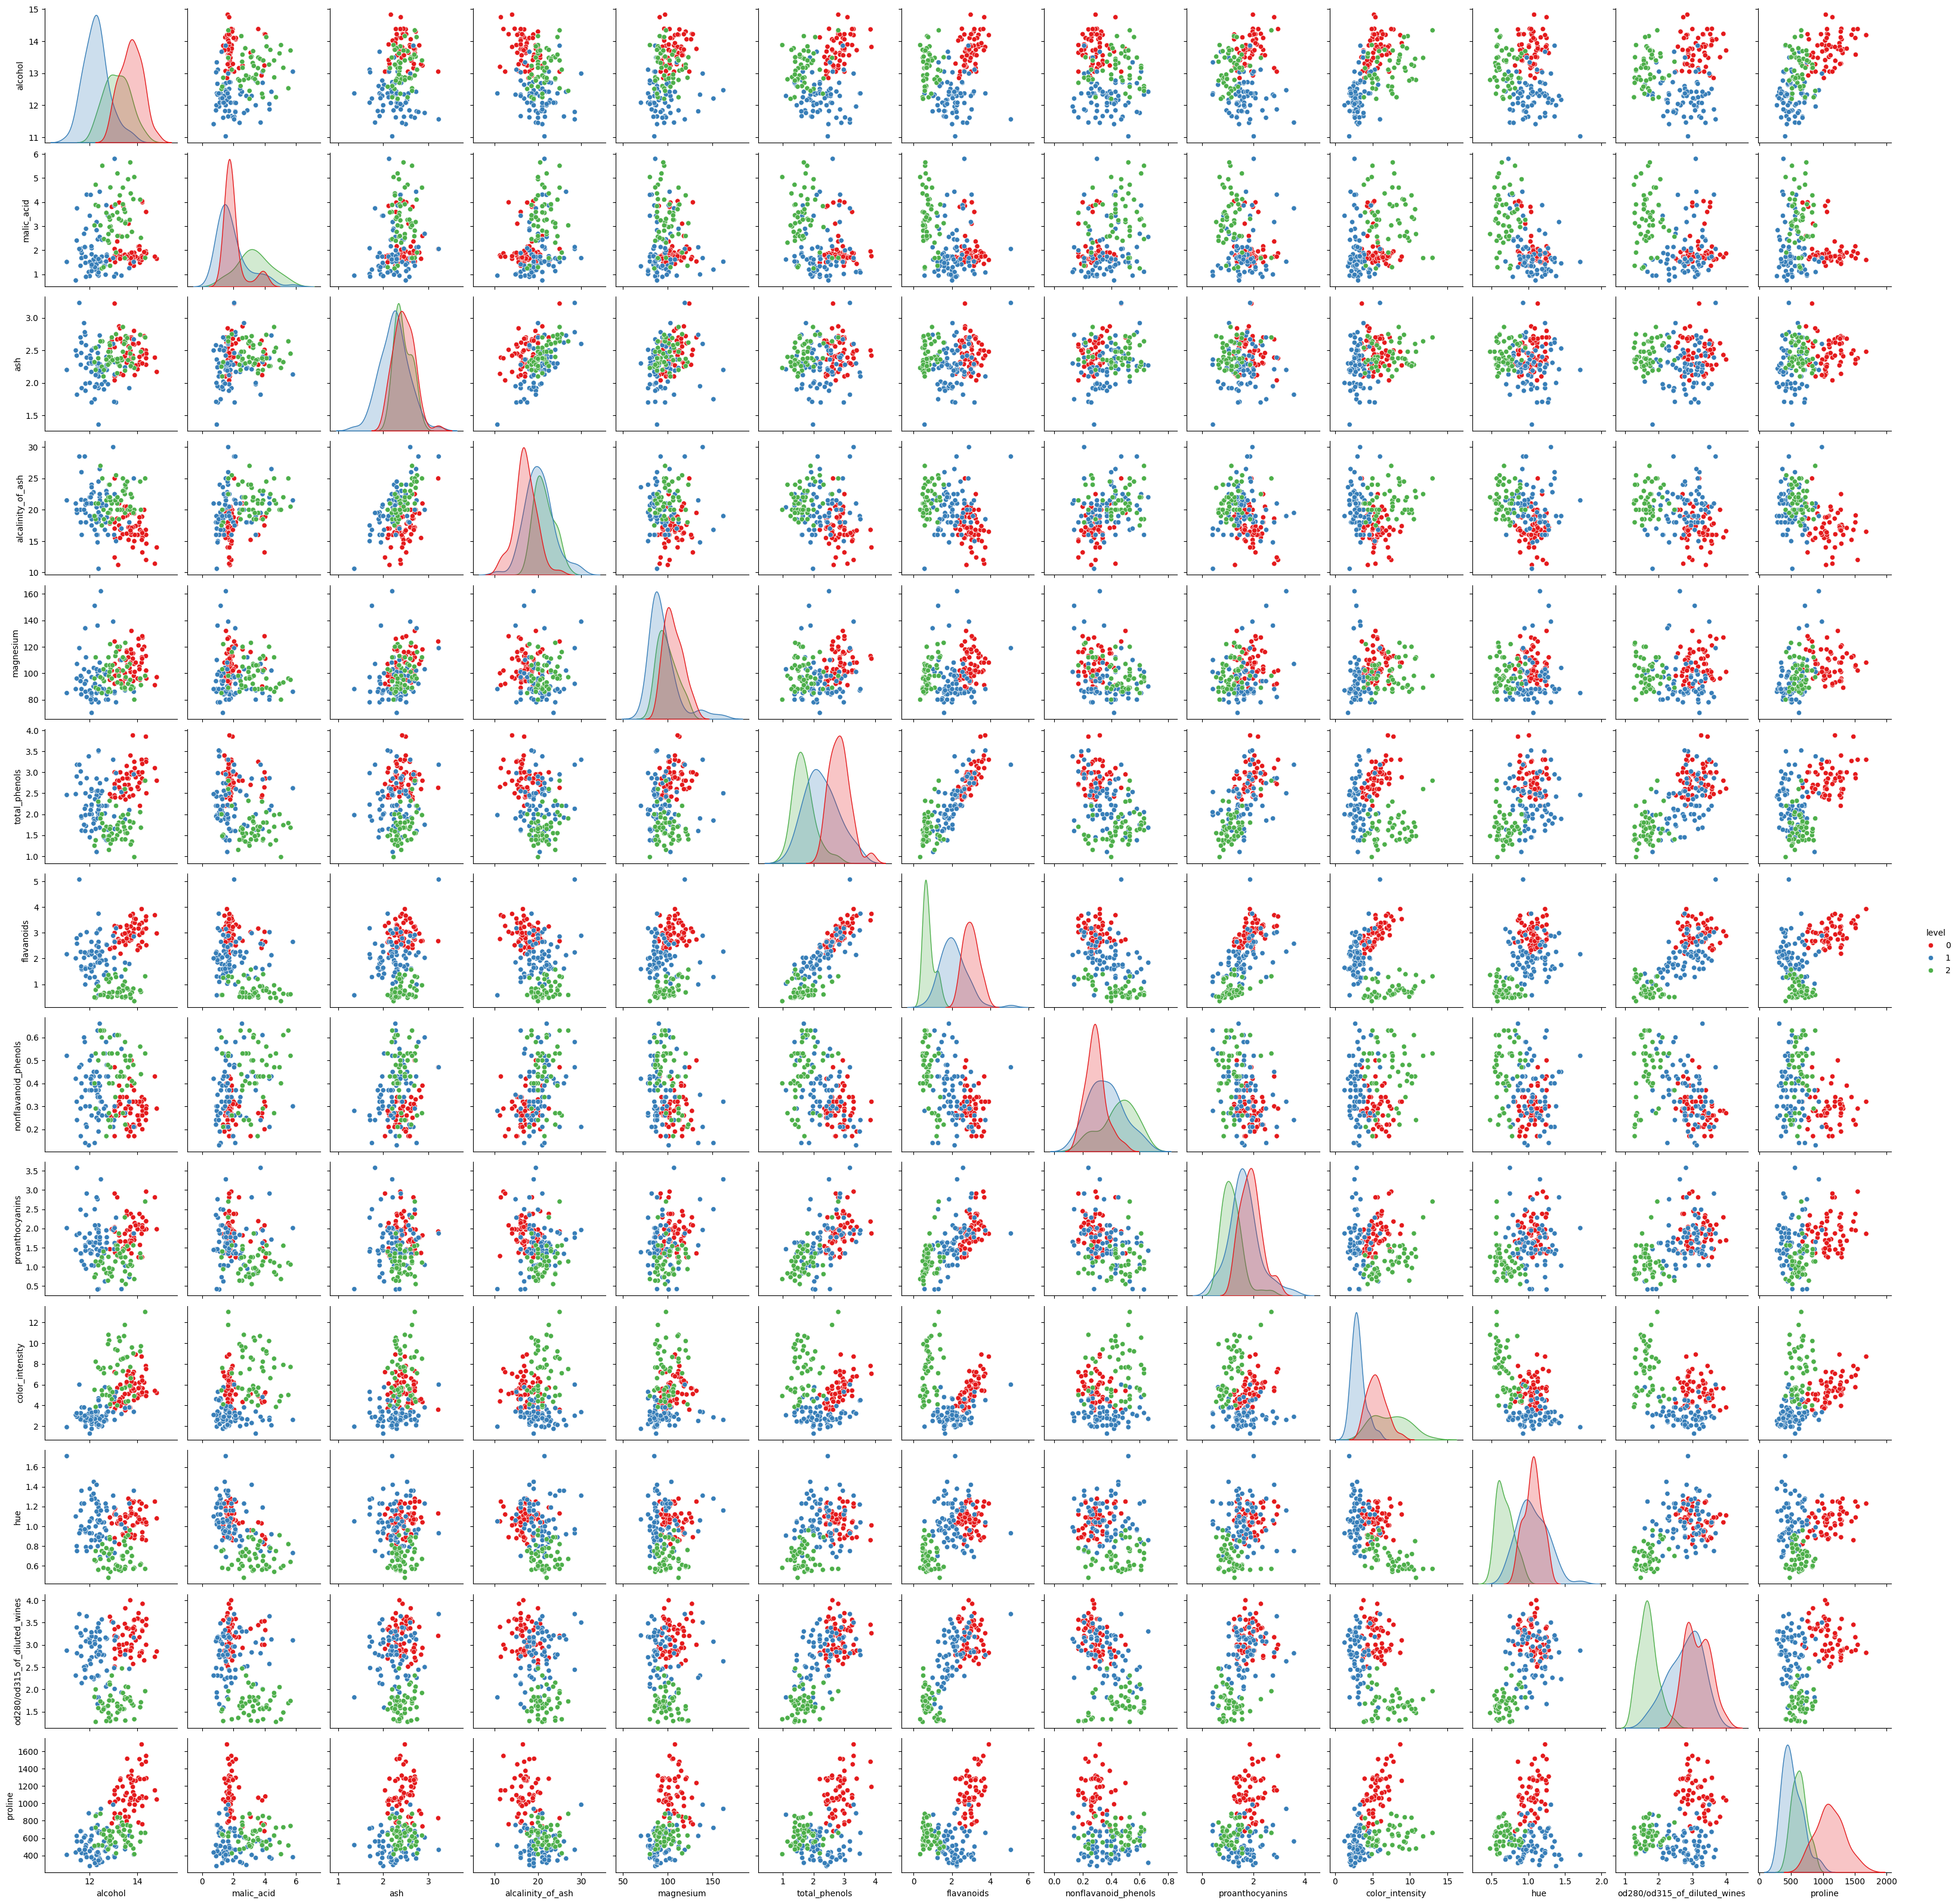

In [7]:
# Visualisasi data dengan Grafik pada data Iris
sns.pairplot(iris,hue='level',palette='Set1')


In [9]:
# Split training and testing data
from sklearn.model_selection import train_test_split
x = iris.drop('level', axis = 1)
y = iris['level']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)


In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [11]:
y_pred = model.predict(x_test)

In [12]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.85      0.81      0.83        27
           2       0.73      0.92      0.81        12

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54



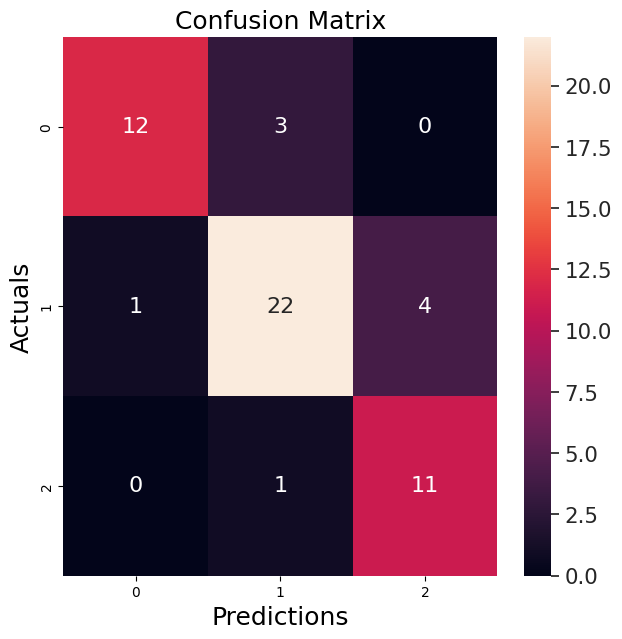

In [13]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, ax=ax,annot=True, annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


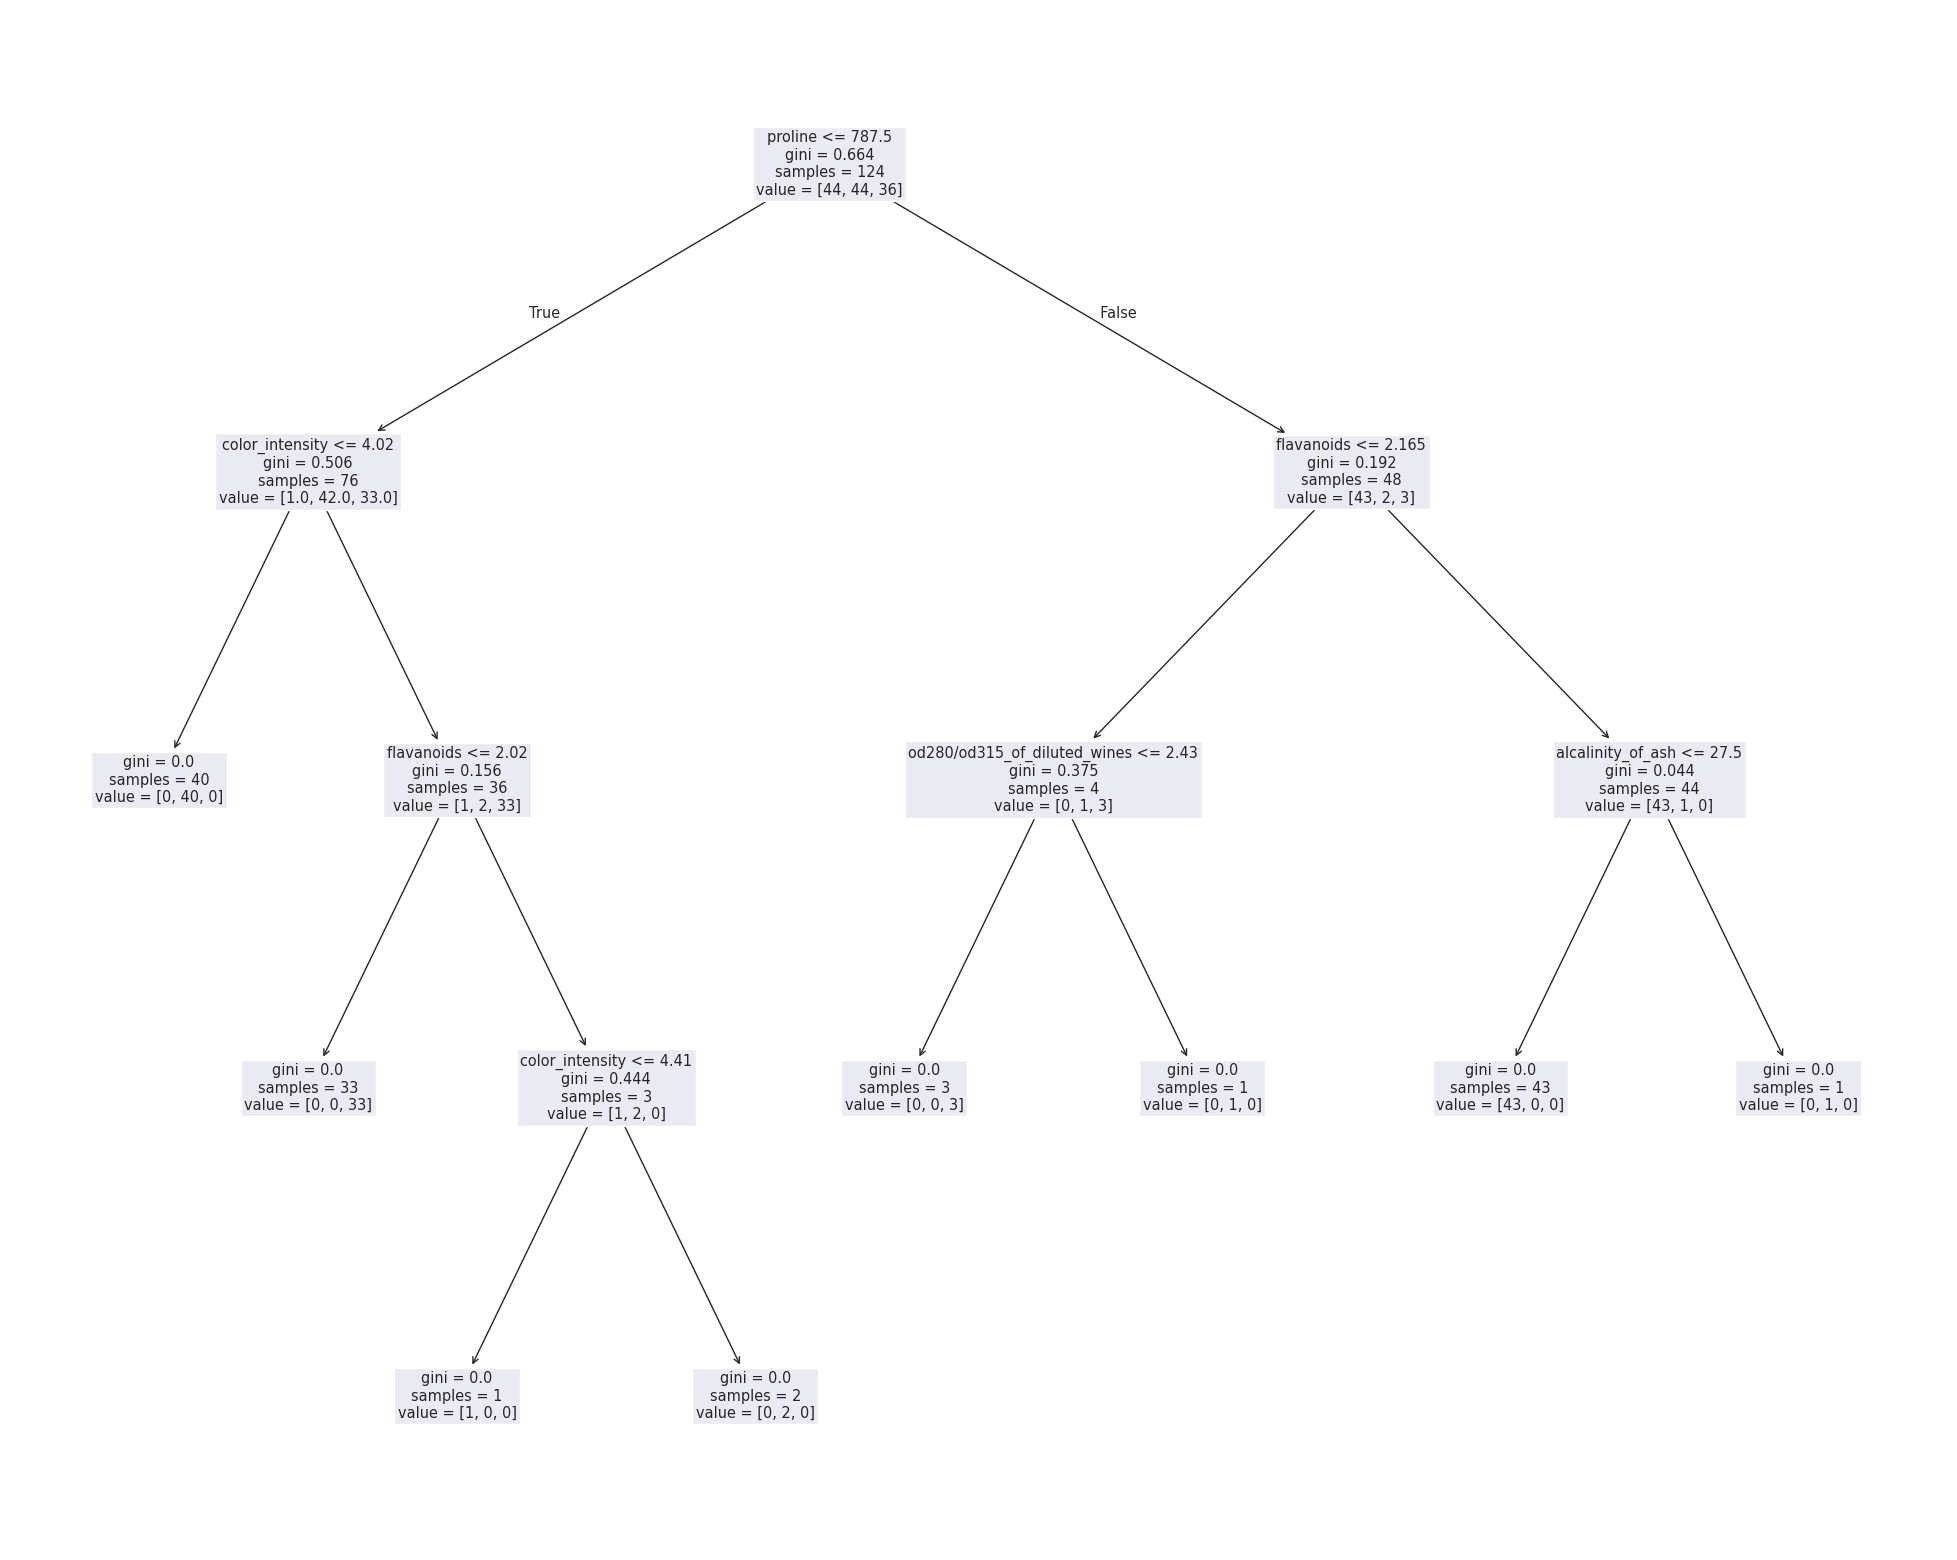

In [14]:
features = iris.columns.drop("level")

#%%
# Visualize tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(model, feature_names=features)
plt.show()


In [17]:
# Example of creating a single Iris data point as a dictionary

test_data = {
    'alcohol': np.random.uniform(11, 15, 1),
    'malic_acid': np.random.uniform(0.7, 5, 1),
    'ash': np.random.uniform(2, 4, 1),
    'alcalinity_of_ash': np.random.uniform(11, 30, 1),
    'magnesium': np.random.randint(80, 160, 1),
    'total_phenols': np.random.uniform(1, 4, 1),
    'flavanoids': np.random.uniform(0.3, 4, 1),
    'nonflavanoid_phenols': np.random.uniform(0.1, 0.7, 1),
    'proanthocyanins': np.random.uniform(1, 3.5, 1),
    'color_intensity': np.random.uniform(3, 13, 1),
    'hue': np.random.uniform(0.4, 1.7, 1),
    'od280/od315_of_diluted_wines': np.random.uniform(1.5, 4, 1),
    'proline': np.random.randint(500, 1700, 1)
}

# Ensure the order of features matches the training data
feature_order = ['alcohol',
    'malic_acid',
    'ash',
    'alcalinity_of_ash',
    'magnesium',
    'total_phenols',
    'flavanoids',
    'nonflavanoid_phenols',
    'proanthocyanins',
    'color_intensity',
    'hue',
    'od280/od315_of_diluted_wines',
    'proline']
prediction_input_df = pd.DataFrame([test_data])
prediction = model.predict(prediction_input_df[feature_order]) # Ensure correct column order
print(prediction)


[2]
